最小二乘法
给定数据集 $$ \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(m)}, y^{(m)})\} $$，其中 $$x^{(i)} \in \mathbb{R}^{n} $$ 是输入特征向量，$$ y^{(i)} \in \mathbb{R} $$ 是对应的输出目标。

假设我们的输入特征矩阵为 $ X $ ，输出目标向量为 $ Y $，参数向量为 $\theta $，则最小二乘法的正规方程表达式为：

$$
\theta = (X^T X)^{-1} X^T Y
$$

其中：
- $ X^T $ 是 $ X $ 的转置矩阵。
- $ ^{-1} $ 表示矩阵的逆。

这个公式直接给出了参数 $ \theta $ 的解析解，而不需要使用迭代算法。这种方法适用于特征数较少的情况，因为它的时间复杂度为 $ O(n^3) $。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams  ## run command settings for plotting

In [2]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [3]:
## 读取数据
path = 'D:\作业\机器学习\Homework_demo/regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head() # 返回data中的前几行数据，默认是前5行。 

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:]#X是所有行，最后一列

In [5]:
X_data.insert(0, 'Ones', 1)
X=X_data.values
Y=y_data.values
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

In [6]:
def normalEquation(X,Y):
    W=np.linalg.inv(X.T@X)@X.T@Y
    return W

In [7]:
W=normalEquation(X,Y)

In [8]:
W

array([[-3.89578088],
       [ 1.19303364]])

正规方程的训练拟合曲线绘制

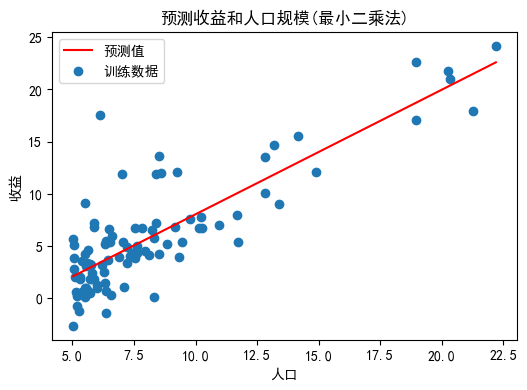

In [9]:
x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('预测收益和人口规模(最小二乘法)')
plt.show()